## Observations and Insights 

1)Overall based on the bar graphs and pie charts, there seems to be a balanced test group based on sex and number that are being tested.  I think this shows the study was done well and used controlled variables to get accurate or unbiased data. 

2)Capomulin seemed to be the best drug, and in every mouse that got this drug regimen seemed to do better.  The Tumor size seemed to shrink.

3)The R value of the last scatter plot was '0.8419363424694717' which means the weight and tumor volume are closely related.  The heavier the mouse is, the bigger the tumor size will be.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = 'outer')
# Display the data table for preview
no_dupe_data = combined_data.drop_duplicates(keep = "last")


In [2]:
# Checking the number of mice.
no_dupe_data["Mouse ID"].value_counts()

g989    12
z969    10
l897    10
c758    10
r701    10
        ..
x226     1
f932     1
u153     1
l872     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [3]:
#mean calculation
meanVals = pd.DataFrame(no_dupe_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())
meanVals.columns = {"Mean of Tumor Vol (mm3)"}
meanVals

,Mean of Tumor Vol (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565
Placebo,54.033581
Propriva,52.368318
Ramicane,40.216745
Stelasyn,54.233149


In [4]:
#median calculation
medianVals = pd.DataFrame(no_dupe_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())
medianVals.columns = {"Median of Tumor Vol (mm3)"}
medianVals

,Median of Tumor Vol (mm3)
Drug Regimen,
Capomulin,41.557809
Ceftamin,51.776157
Infubinol,51.820584
Ketapril,53.698743
Naftisol,52.509285
Placebo,52.288934
Propriva,50.909965
Ramicane,40.673236
Stelasyn,52.431737


In [5]:
#variance calculation
varVals = pd.DataFrame(no_dupe_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())
varVals.columns = {"Variance of Tumor Vol (mm3)"}
varVals

,Variance of Tumor Vol (mm3)
Drug Regimen,
Capomulin,24.947764
Ceftamin,39.290177
Infubinol,43.128684
Ketapril,68.553577
Naftisol,66.173479
Placebo,61.168083
Propriva,42.278090
Ramicane,23.486704
Stelasyn,59.450562


In [6]:
#std calculation
stdVals = pd.DataFrame(no_dupe_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())
stdVals.columns = {"STD of Tumor Vol (mm3)"}
stdVals

,STD of Tumor Vol (mm3)
Drug Regimen,
Capomulin,4.994774
Ceftamin,6.268188
Infubinol,6.567243
Ketapril,8.279709
Naftisol,8.134708
Placebo,7.821003
Propriva,6.502160
Ramicane,4.846308
Stelasyn,7.710419


In [7]:
#SEM calculation
semVals = pd.DataFrame(no_dupe_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())
semVals.columns = {"SEM of Tumor Vol (mm3)"}
semVals

,SEM of Tumor Vol (mm3)
Drug Regimen,
Capomulin,0.329346
Ceftamin,0.469821
Infubinol,0.492236
Ketapril,0.603860
Naftisol,0.596466
Placebo,0.581331
Propriva,0.514041
Ramicane,0.320955
Stelasyn,0.573111


In [8]:
#making the summary table
sum_table = meanVals

sum_table["Median"] = round(medianVals, 2)
sum_table["Variance"] = round(varVals, 2)
sum_table["STD"] = round(stdVals, 2)
sum_table["SEM"] = round(semVals, 2)

sum_table

,Mean of Tumor Vol (mm3),Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.56,24.95,4.99,0.33
Ceftamin,52.591172,51.78,39.29,6.27,0.47
Infubinol,52.884795,51.82,43.13,6.57,0.49
Ketapril,55.235638,53.70,68.55,8.28,0.60
Naftisol,54.331565,52.51,66.17,8.13,0.60
Placebo,54.033581,52.29,61.17,7.82,0.58
Propriva,52.368318,50.91,42.28,6.50,0.51
Ramicane,40.216745,40.67,23.49,4.85,0.32
Stelasyn,54.233149,52.43,59.45,7.71,0.57


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

sum_table

,Mean of Tumor Vol (mm3),Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.56,24.95,4.99,0.33
Ceftamin,52.591172,51.78,39.29,6.27,0.47
Infubinol,52.884795,51.82,43.13,6.57,0.49
Ketapril,55.235638,53.70,68.55,8.28,0.60
Naftisol,54.331565,52.51,66.17,8.13,0.60
Placebo,54.033581,52.29,61.17,7.82,0.58
Propriva,52.368318,50.91,42.28,6.50,0.51
Ramicane,40.216745,40.67,23.49,4.85,0.32
Stelasyn,54.233149,52.43,59.45,7.71,0.57


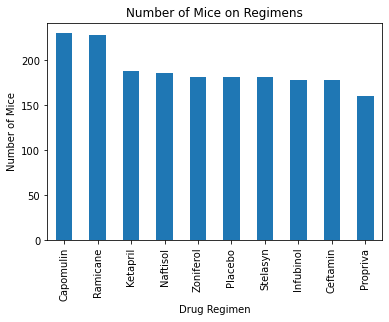

In [10]:
#I WAS NOT SURE WHICH WAS CORRECT.  
#EITHER DUPLICATE MICE ID OR WITH UNIQUE VALUES (Mouse ID) SO I DID BOTH.

counts = no_dupe_data["Drug Regimen"].value_counts()
counts

barchart = counts.plot(kind='bar', legend = None)

plt.title("Number of Mice on Regimens")
barchart.set_xlabel("Drug Regimen")
barchart.set_ylabel("Number of Mice")

plt.show()


## Bar and Pie Charts

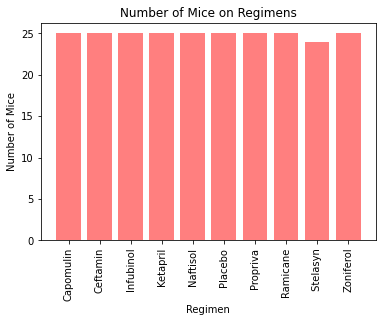

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
uniqueVals = pd.DataFrame(no_dupe_data.drop_duplicates(subset=["Mouse ID"]))
totalMice = pd.DataFrame(uniqueVals.groupby("Drug Regimen")["Mouse ID"].count())
totalMice

x_axis = np.arange(len(totalMice))

plt.bar(x_axis, totalMice["Mouse ID"], color ="r", alpha=0.5, align="center")

tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", " Stelasyn", "Zoniferol"], rotation = 90)

plt.title("Number of Mice on Regimens")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.show()

In [12]:
totalMice

,Mouse ID
Drug Regimen,
Capomulin,25
Ceftamin,25
Infubinol,25
Ketapril,25
Naftisol,25
Placebo,25
Propriva,25
Ramicane,25
Stelasyn,24


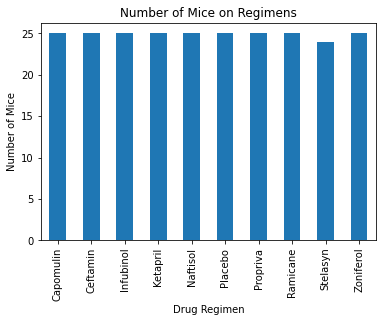

In [13]:
barchart = totalMice.plot(kind='bar', legend = None)

plt.title("Number of Mice on Regimens")
barchart.set_xlabel("Drug Regimen")
barchart.set_ylabel("Number of Mice")

plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_df = no_dupe_data[["Mouse ID", "Sex"]]

no_dupe_gender_df = pd.DataFrame(gender_df.drop_duplicates(subset = ["Mouse ID"]))

no_dupe_gender_df

,Mouse ID,Sex
0,k403,Male
10,s185,Female
20,x401,Female
30,m601,Male
40,g791,Male
...,...,...
1858,z314,Female
1860,z435,Female
1863,z581,Female
1873,z795,Female


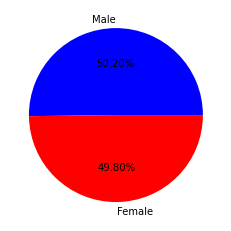

In [15]:
male = (no_dupe_gender_df.loc[:, "Sex"] == "Male").mean()
female = (no_dupe_gender_df.loc[:, "Sex"] == "Female").mean()
percentages = [male, female]
sexes = ["Male", "Female"]
colors = ["blue", "red"]

plt.pie(percentages, labels = sexes, colors = colors, autopct='%.2f%%')
plt.show()

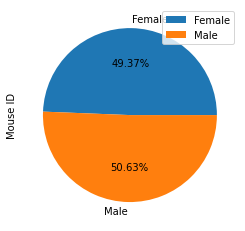

In [16]:
no_dupe_data.groupby(["Sex"]).count().plot(kind='pie', y ="Mouse ID", autopct='%.2f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

test = no_dupe_data[["Mouse ID"]]

test["Mouse ID"] = test.drop_duplicates(keep = 'last')

test["Timepoint"] = no_dupe_data["Timepoint"]

final_time_df = test[test["Mouse ID"].notna()]

# Start by getting the last (greatest) timepoint for each mouse
final_time_df

<ipython-input-17-77f3c655256c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Mouse ID"] = test.drop_duplicates(keep = 'last')
<ipython-input-17-77f3c655256c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Timepoint"] = no_dupe_data["Timepoint"]


,Mouse ID,Timepoint
9,k403,45
19,s185,45
29,x401,45
39,m601,45
49,g791,45
...,...,...
1859,z314,5
1862,z435,10
1872,z581,45
1882,z795,45


In [18]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(final_time_df, no_dupe_data, how="left", left_index=True, right_index=True)

merged_df

,Mouse ID_x,Timepoint_x,Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,k403,45,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,45,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,45,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,45,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,45,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...,...,...
1859,z314,5,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,10,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,45,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,45,z795,Naftisol,Female,13,29,45,65.741070,3


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin','Ramicane','Infubinol','Ceftamin']



In [20]:
#capomulin df
capomulin_only =  merged_df.loc[merged_df["Drug Regimen"] == "Capomulin"]

capomulinList = capomulin_only["Tumor Volume (mm3)"].tolist()
capomulin_only

,Mouse ID_x,Timepoint_x,Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
19,s185,45,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,45,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,45,m601,Capomulin,Male,22,17,45,28.430964,1
64,f966,20,f966,Capomulin,Male,16,17,20,30.485985,0
104,u364,45,u364,Capomulin,Male,18,17,45,31.023923,3
124,y793,45,y793,Capomulin,Male,17,17,45,31.896238,2
134,r554,45,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,45,m957,Capomulin,Female,3,19,45,33.329098,1
164,t565,45,t565,Capomulin,Female,20,17,45,34.455298,0
204,i738,45,i738,Capomulin,Female,23,20,45,37.311846,2


In [21]:
#ramicane df
ramicane_only =  merged_df.loc[merged_df["Drug Regimen"] == "Ramicane"]
ramicaneList = ramicane_only["Tumor Volume (mm3)"].tolist()
ramicane_only

,Mouse ID_x,Timepoint_x,Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
9,k403,45,k403,Ramicane,Male,21,16,45,22.050126,1
49,g791,45,g791,Ramicane,Male,11,16,45,29.128472,1
59,s508,45,s508,Ramicane,Male,1,17,45,30.276232,0
74,m546,45,m546,Ramicane,Male,18,16,45,30.564625,1
84,z578,45,z578,Ramicane,Male,11,16,45,30.638696,0
94,j913,45,j913,Ramicane,Female,4,17,45,31.560470,1
114,n364,45,n364,Ramicane,Male,4,17,45,31.095335,1
154,c758,45,c758,Ramicane,Male,9,17,45,33.397653,1
174,a644,45,a644,Ramicane,Female,7,17,45,32.978522,1
184,i177,45,i177,Ramicane,Male,10,18,45,33.562402,3


In [22]:
#infubinol df
infubinol_only =  merged_df.loc[merged_df["Drug Regimen"] == "Infubinol"]
infubinolList = infubinol_only["Tumor Volume (mm3)"].tolist()
infubinol_only

,Mouse ID_x,Timepoint_x,Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
463,a203,45,a203,Infubinol,Female,20,23,45,67.973419,2
473,a251,45,a251,Infubinol,Female,21,25,45,65.525743,1
530,a577,30,a577,Infubinol,Female,6,25,30,57.031862,2
540,a685,45,a685,Infubinol,Male,8,30,45,66.083066,3
637,c139,45,c139,Infubinol,Male,11,28,45,72.226731,2
669,c326,5,c326,Infubinol,Female,18,25,5,36.321346,0
742,c895,30,c895,Infubinol,Female,7,29,30,60.969711,2
800,e476,45,e476,Infubinol,Male,23,26,45,62.435404,1
834,f345,45,f345,Infubinol,Male,23,26,45,60.918767,1
949,i386,40,i386,Infubinol,Female,23,29,40,67.289621,4


In [23]:
#ceftamin df
ceftamin_only =  merged_df.loc[merged_df["Drug Regimen"] == "Ceftamin"]
ceftaminList = ceftamin_only["Tumor Volume (mm3)"].tolist()
ceftamin_only

,Mouse ID_x,Timepoint_x,Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
493,a275,45,a275,Ceftamin,Female,20,28,45,62.999356,3
594,b447,0,b447,Ceftamin,Male,2,30,0,45.000000,0
600,b487,25,b487,Ceftamin,Female,6,28,25,56.057749,1
617,b759,30,b759,Ceftamin,Female,12,25,30,55.742829,1
840,f436,15,f436,Ceftamin,Female,3,25,15,48.722078,2
940,h531,5,h531,Ceftamin,Male,5,27,5,47.784682,0
993,j296,45,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,45,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,45,l471,Ceftamin,Female,7,28,45,67.748662,1
1119,l490,30,l490,Ceftamin,Male,24,26,30,57.918381,3


In [24]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Capomulin   
capomulin_vols = capomulin_only["Tumor Volume (mm3)"]

quartiles = capomulin_vols.quantile([.25, .5, .75])

capomulin_lowerq = quartiles[0.25]
capomulin_upperq = quartiles[0.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq

print(f"Cap Lower Q: {capomulin_lowerq}")
print(f"Cap Upper Q: {capomulin_upperq}")

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

print(f"Cap lower bound: {capomulin_lower_bound}")
print(f"Cap Upper bound: {capomulin_upper_bound}")

Cap Lower Q: 32.37735684
Cap Upper Q: 40.1592203
Cap lower bound: 20.70456164999999
Cap Upper bound: 51.83201549


In [25]:
#ramicane
ramicane_vols = ramicane_only["Tumor Volume (mm3)"]

quartiles = ramicane_vols.quantile([.25, .5, .75])

ramicane_lowerq = quartiles[0.25]
ramicane_upperq = quartiles[0.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq

print(f"Ramicane Lower Q: {ramicane_lowerq}")
print(f"Ramicane Upper Q: {ramicane_upperq}")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

print(f"Ramicane lower bound: {ramicane_lower_bound}")
print(f"Ramicane Upper bound: {ramicane_upper_bound}")

Ramicane Lower Q: 31.56046955
Ramicane Upper Q: 40.65900627
Ramicane lower bound: 17.912664470000003
Ramicane Upper bound: 54.30681135


In [26]:
#infubinol
infubinol_vols = infubinol_only["Tumor Volume (mm3)"]

quartiles = infubinol_vols.quantile([.25, .5, .75])

infubinol_lowerq = quartiles[0.25]
infubinol_upperq = quartiles[0.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq

print(f"Infubinol Lower Q: {infubinol_lowerq}")
print(f"Infubinol Upper Q: {infubinol_upperq}")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

print(f"Infubinol lower bound: {infubinol_lower_bound}")
print(f"Infubinol Upper bound: {infubinol_upper_bound}")

Infubinol Lower Q: 54.04860769
Infubinol Upper Q: 65.52574285
Infubinol lower bound: 36.83290494999999
Infubinol Upper bound: 82.74144559000001


In [27]:
#ceftamin
ceftamin_vols = ceftamin_only["Tumor Volume (mm3)"]

quartiles = ceftamin_vols.quantile([.25, .5, .75])

ceftamin_lowerq = quartiles[0.25]
ceftamin_upperq = quartiles[0.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq

print(f"Ceftamin Lower Q: {ceftamin_lowerq}")
print(f"Ceftamin Upper Q: {ceftamin_upperq}")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Ceftamin lower bound: {ceftamin_lower_bound}")
print(f"Ceftamin Upper bound: {ceftamin_upper_bound}")

Ceftamin Lower Q: 48.72207785
Ceftamin Upper Q: 64.29983003
Ceftamin lower bound: 25.355449580000002
Ceftamin Upper bound: 87.66645829999999


In [28]:
#capmulin
capmulin_outliers = capomulin_only.loc[capomulin_only["Tumor Volume (mm3)"] > capomulin_upper_bound]
capmulin_outliers = capomulin_only.loc[capomulin_only["Tumor Volume (mm3)"] < capomulin_lower_bound]

capmulin_outliers

,Mouse ID_x,Timepoint_x,Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites


In [29]:
infubinol_outliers = infubinol_only.loc[infubinol_only["Tumor Volume (mm3)"] > infubinol_upper_bound]
infubinol_outliers = infubinol_only.loc[infubinol_only["Tumor Volume (mm3)"] < infubinol_lower_bound]

infubinol_outliers

,Mouse ID_x,Timepoint_x,Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites
669,c326,5,c326,Infubinol,Female,18,25,5,36.321346,0


In [30]:
#ceftamin
ceftamin_outliers = ceftamin_only.loc[ceftamin_only["Tumor Volume (mm3)"] > ceftamin_upper_bound]
ceftamin_outliers = ceftamin_only.loc[ceftamin_only["Tumor Volume (mm3)"] < ceftamin_lower_bound]

ceftamin_outliers

,Mouse ID_x,Timepoint_x,Mouse ID_y,Drug Regimen,Sex,Age_months,Weight (g),Timepoint_y,Tumor Volume (mm3),Metastatic Sites


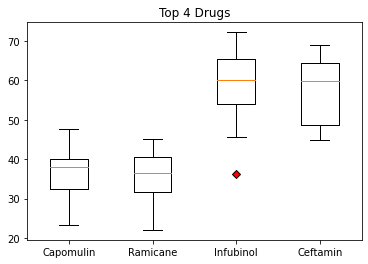

In [31]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red = dict(markerfacecolor='r', marker='D')
data = [capomulinList, ramicaneList, infubinolList, ceftaminList]

fig1, ax1 = plt.subplots()
ax1.set_title("Top 4 Drugs")
ax1.boxplot(data, showfliers=True, flierprops = red)

ax1.set_xticklabels(drug_list)

plt.show()

## Line and Scatter Plots

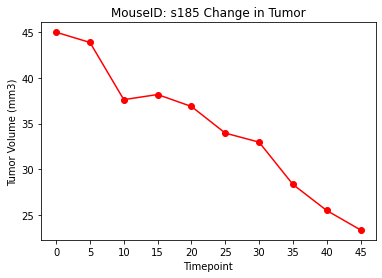

In [32]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseID = "s185"

lineData = no_dupe_data.loc[no_dupe_data["Mouse ID"] == mouseID]

Timepoints = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

tumVols = lineData["Tumor Volume (mm3)"]
    
lineChart, = plt.plot(Timepoints, tumVols, marker= "o", color = "r")

plt.title("MouseID: s185 Change in Tumor")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

plt.xticks(np.arange(0, max(tumVols) + 1, 5.0))

plt.show()

<IPython.core.display.Javascript object>


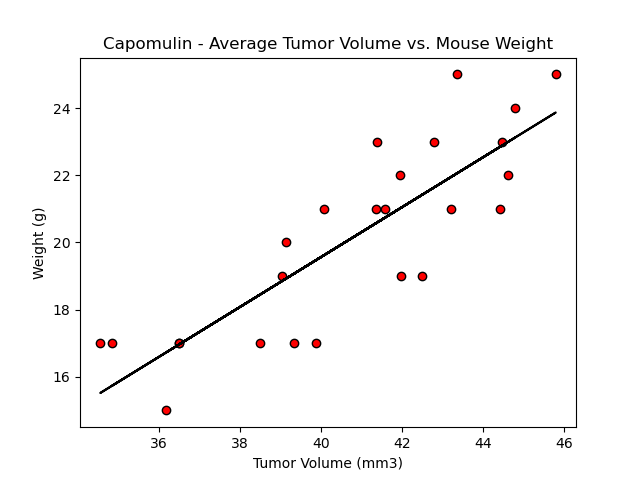

In [33]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
%matplotlib notebook

scatter_data = no_dupe_data.loc[no_dupe_data["Drug Regimen"] == "Capomulin"]

mean_volumes = scatter_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mean_weight =  scatter_data.groupby("Mouse ID")["Weight (g)"].mean()

scatter_plot = plt.scatter(mean_volumes, mean_weight, marker="o", facecolors="r",edgecolors="black")

#setting limits
plt.xlim(min(mean_volumes - .5), max(mean_volumes + 0.5))
plt.ylim(min(mean_weight - .5), max(mean_weight + 0.5))

#labels
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Capomulin - Average Tumor Volume vs. Mouse Weight")

plt.show()

In [34]:
#Calculate the correlation coefficient and linear regression model
#between mouse weight and average tumor volume for the Capomulin 
#treatment. Plot the linear regression model on top of the previous 
#scatter plot.
corr = st.pearsonr(mean_volumes, mean_weight)[0]

corr

0.8419363424694717

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mean_volumes, mean_weight)

regress_values = mean_volumes * slope + intercept

line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

line_eq

plt.plot(mean_volumes, regress_values, color = "black")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Weight (g)")
plt.title("Capomulin - Average Tumor Volume vs. Mouse Weight")

plt.show()